# Question No.1. NLP Dataset: 
## Sentiment Analysis dataset - 1.6 Million tweets. 

In [3]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


## 1. Import Libraries/Dataset (0 mark)
1. Import the required libraries and the dataset (use Google Drive if required).
2. Check the GPU available (recommended- use free GPU provided by Google Colab).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import regularizers, models, layers

# random state
RS = np.random.randint(100)
print(f'Random state is {RS}')

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Random state is 1


In [2]:
# global variables
FILE='training.1600000.processed.noemoticon.csv'
# FOLDER='.' # local
FOLDER='/content/drive/MyDrive/sem3/DL/a1/' # drive
DATAFILE=os.path.join(FOLDER, FILE)
DATA_COLS=['target','ids','date','flag','user','text']
X_COL = ['text']
Y_COL = ['target']

print(f'datafile is {DATAFILE}')


datafile is /content/drive/MyDrive/sem3/DL/a1/training.1600000.processed.noemoticon.csv


In [3]:
# import the dataset
df = pd.read_csv(DATAFILE, names=DATA_COLS, encoding='latin-1')
print(df.shape)
df.head(3)

(1600000, 6)


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [ ]:
df.tail(3)

,target,ids,date,flag,user,text
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [4]:
# in target col, change value 4 to 1, so its classification between 0 and 1
df['target'] = df['target'].replace([4],[1])


## 2. Data Visualization (0.75 mark)
1. Print at least two records from each class of the dataset, for a sanity check that labels match the text.
2. Plot a bar graph of class distribution in the dataset. Each bar depicts the number of records belonging to a particular class in the dataset. (recommended - matplotlib/seaborn libraries)
3. Any other visualizations that seem appropriate for this problem are encouraged but not necessary, for the points.
4. Print the shapes of train and test data.

In [ ]:
df['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [ ]:
df.head(4)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


**1. Print at least two records from each class of the dataset, for a sanity check that labels match the text.**

In [ ]:
# target 0
df[df['target']==0].head(5)


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# target 1 i.e. previously 4
df[df['target']==1].head(5)

,target,ids,date,flag,user,text
800000,1,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,1,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,1,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,1,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


**2. Plot a bar graph of class distribution in the dataset. Each bar depicts the number of records belonging to a particular class in the dataset. (recommended - matplotlib/seaborn libraries)**


Target distribution plot using Matplotlib


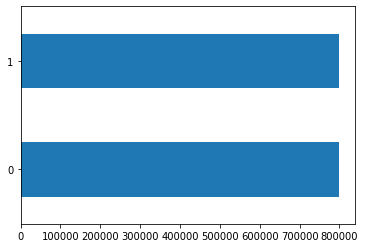

------------------------------

Target distribution plot using seaborn


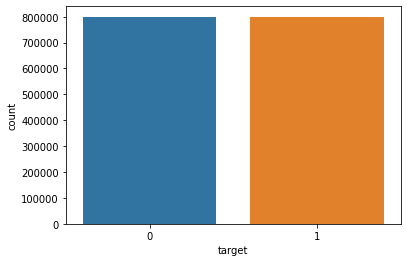

In [5]:
# matplotlib
print('\nTarget distribution plot using Matplotlib')
df['target'].value_counts().plot(kind='barh')
plt.show()

# seaborn
print(f'{"-"*30}')
print('\nTarget distribution plot using seaborn')
sns.countplot(df['target'])
plt.show()


**3. Any other visualizations that seem appropriate for this problem are encouraged but not necessary, for the points.**

**4. Print the shapes of train and test data.**

In [6]:
X = df[X_COL]
y = df[Y_COL]

print(f'Shape of X is {X.shape}')
print(f'Shape of Y is {y.shape}')

Shape of X is (1600000, 1)
Shape of Y is (1600000, 1)


In [7]:
# perform train test split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RS)
X_train, X_test, y_train, y_test = train_test_split(np.array(X).flatten(),np.array(y).flatten(), test_size=0.2, random_state=RS, stratify=y)

# print shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1280000,), (320000,), (1280000,), (320000,))

In [8]:
print(f'Shape of Train data is {X_train.shape}')
print(f'Shape of Test data is {X_test.shape}')

Shape of Train data is (1280000,)
Shape of Test data is (320000,)


In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [10]:
train_examples_batch, train_labels_batch = next(iter(train_dataset.batch(10)))
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"Rise and shining lol. I'm up a few mins later then planned but no rush i'll be out the door in time ",
       b"Had a 2nd interview today. It's looking promising. ",
       b'@EmilyAlbracht I feel your pain! ',
       b'http://twitpic.com/6sdbj - 4yr old son and I went exploring &amp; hiking today and this is what we found  Luv amphibians!',
       b'is lonely because all my housemates have gone to the pub ',
       b'@tinaseamonster It must be that they just seemed like that belong there and not strange or unexpected...kind of like your suggested! ',
       b'@jonas_twilight3 ',
       b'@mynameischerie hey girl, i am now following you ',
       b"@govinda108 um that's really scary, please be safe!  Btw ill be in orlando next week ",
       b'feeling a little under the weather...   Thank God tomorrow is FRIDAY!!!!'],
      dtype=object)>

## 3. Data Pre-processing (0.25 mark)
1. Need for this Step- Since the models we use cannot accept string inputs or cannot be of the string format. We have to come up with a way of handling this step. The discussion of different ways of handling this step is out of the scope of this assignment.
2. Please usethis pre-trained embedding layer  (Links to an external site.)
3.  (Links to an external site.) (Links to an external site.)
from TensorFlow hub for this assignment. This link also has a code snippet on how to convert a sentence to a vector. Refer to that for further clarity on this subject.
4. Bring the train and test data in the required format.

**Embedding layer**

We created a hub layer which we will add as first layer of model. 

In [11]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

## 4. Model Building (0.2*5 = 1 mark)
1. Sequential Model layers- Use AT LEAST 5 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
2. Add L2 regularization to all the layers.
3. Add one layer of dropout at the appropriate position and give reasons.
4. Use relu as activation function at all appropriate layers.
5. Print the model summary.

**MODEL**

In [12]:
# function for model building
def Model_build(units=32):
  model = tf.keras.Sequential()
  # layer 1 = input layer
  model.add(hub_layer)
  # layer 2 = hidden layer1 
  model.add(tf.keras.layers.Dense(16*units, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  # layer 3 = dropout layer
  model.add(tf.keras.layers.Dropout(0.5))
  # layer 4 = hidden layer2
  model.add(tf.keras.layers.Dense(8*units, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  # layer 5 = hidden layer3
  model.add(tf.keras.layers.Dense(4*units, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  # layer 6 = hidden layer4
  model.add(tf.keras.layers.Dense(2*units, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  # layer 7 = hidden layer5
  model.add(tf.keras.layers.Dense(units, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  # layer 8 = hidden layer6
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  # model build
  model.build()
  #print(model.summary())
  return model


In [13]:
# model build
first_model=Model_build(16)
print(first_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                5

## 5. Model Compilation (0.25 mark)
1. Compile the model with the appropriate loss function.
2. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
3. Use accuracy as a metric.


**It is considered that the ideal Learning Rate for Adam optimizer is .001**

In [14]:
# adam optimizer with learning rate=0.01
optimizer = tf.keras.optimizers.Adam(lr=0.001)

# model compilation
first_model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              # loss="binary_crossentropy",
              metrics=['accuracy'])


In [15]:
# adding callback
def get_callbacks():
  return tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

## 6. Model Training (0.5 + 0.25 = 0.75 mark)
1. Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
2. Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

**Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.**

In [17]:
history={}
history['first_model'] = first_model.fit(train_dataset.shuffle(10000).batch(512),
                    epochs=10,callbacks=get_callbacks(),
                    validation_data=test_dataset.batch(512),
                    verbose=1)

Epoch 1/10
2500/2500 [==============================] - 194s 78ms/step - loss: 0.3644 - accuracy: 0.8759 - val_loss: 0.6419 - val_accuracy: 0.7560
Epoch 2/10
2500/2500 [==============================] - 192s 77ms/step - loss: 0.3426 - accuracy: 0.8864 - val_loss: 0.6658 - val_accuracy: 0.7514
Epoch 3/10
2500/2500 [==============================] - 191s 77ms/step - loss: 0.3272 - accuracy: 0.8934 - val_loss: 0.6803 - val_accuracy: 0.7453
Epoch 4/10
2500/2500 [==============================] - 191s 76ms/step - loss: 0.3151 - accuracy: 0.8986 - val_loss: 0.7117 - val_accuracy: 0.7417


**Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.**

In [18]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  #plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()



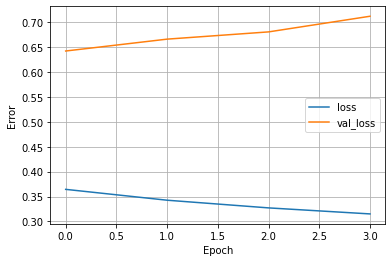

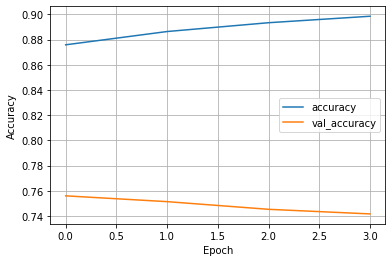

In [19]:
# plot loss
plot_loss(history['first_model'])
# plot accuracy
plot_accuracy(history['first_model'])

## 7. Model Evaluation (0.5 + 0.5 = 1 mark)
1. Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
2. Print the two most incorrectly classified records for each class in the test dataset.

**Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.**

In [20]:
# final training loss
print('final training loss:' ,{history['first_model'].history["loss"][-1]})
# final training accuracy
print('\nfinal training accuracy:', {history['first_model'].history["accuracy"][-1]})
# final validation loss
print('\nfinal validation loss: ',{history['first_model'].history["val_loss"][-1]})
# final validation accuracy
print('\nfinal validation accuracy:', {history['first_model'].history["val_accuracy"][-1]})


final training loss: {0.3150925934314728}

final training accuracy: {0.8985671997070312}

final validation loss:  {0.7117066979408264}

final validation accuracy: {0.7416843771934509}


In [21]:
y_test_arr=tf.convert_to_tensor(y_test)
#test_examples_batch, test_labels_batch = next(iter(test_dataset))
x_test=tf.convert_to_tensor(X_test)
Y_test_pred = first_model.predict(x_test)
Y_test_pred=np.array([[1] if p>=0.5 else [0] for p in Y_test_pred])

# classification_report
print(classification_report(y_test_arr, Y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74    160000
           1       0.74      0.75      0.74    160000

    accuracy                           0.74    320000
   macro avg       0.74      0.74      0.74    320000
weighted avg       0.74      0.74      0.74    320000



## Hyperameter Tuning

**Model Without Regulaization**

In [22]:
# function to build model
def Model_build_reg(units=32):
  # model building
  model = tf.keras.Sequential()
  #embadding Layer
  model.add(hub_layer)
  model.add(tf.keras.layers.Dense(16*units, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(8*units, activation='relu'))
  model.add(tf.keras.layers.Dense(4*units, activation='relu'))
  model.add(tf.keras.layers.Dense(2*units, activation='relu'))
  model.add(tf.keras.layers.Dense(units, activation='relu'))
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  # model build
  model.build()
  #print(model.summary())
  #learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  return model

In [23]:
# model compile
# It is considered that the ideal Learning Rate for Adam optimizer is .001
No_reg_model=Model_build_reg(16)
No_reg_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
def get_callbacks():
  return tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
   

In [25]:
# model training
history['No_reg_model'] = No_reg_model.fit(train_dataset.shuffle(10000).batch(512),
                    epochs=6,callbacks=get_callbacks(),
                    validation_data=test_dataset.batch(512),
                    verbose=1)

Epoch 1/6
2500/2500 [==============================] - 191s 76ms/step - loss: 0.3086 - accuracy: 0.8683 - val_loss: 0.6738 - val_accuracy: 0.7465
Epoch 2/6
2500/2500 [==============================] - 190s 76ms/step - loss: 0.3033 - accuracy: 0.8697 - val_loss: 0.6689 - val_accuracy: 0.7489
Epoch 3/6
2500/2500 [==============================] - 191s 77ms/step - loss: 0.2988 - accuracy: 0.8713 - val_loss: 0.6855 - val_accuracy: 0.7505
Epoch 4/6
2500/2500 [==============================] - 191s 77ms/step - loss: 0.2930 - accuracy: 0.8737 - val_loss: 0.6870 - val_accuracy: 0.7525
Epoch 5/6
2500/2500 [==============================] - 191s 77ms/step - loss: 0.2892 - accuracy: 0.8757 - val_loss: 0.6961 - val_accuracy: 0.7488


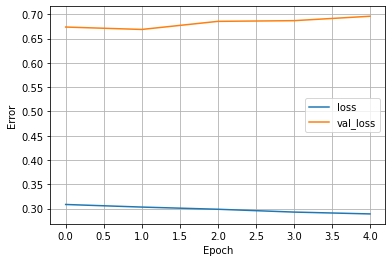

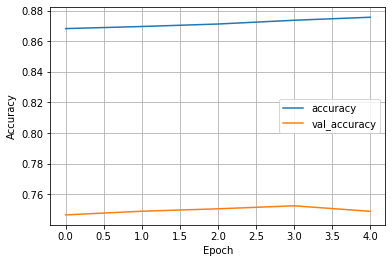

In [26]:
# plot loss
plot_loss(history['No_reg_model'])
# plot accuracy
plot_accuracy(history['No_reg_model'])

In [27]:
# final training loss
print('final training loss:' ,{history['No_reg_model'].history["loss"][-1]})
# final training accuracy
print('\nfinal training accuracy:', {history['No_reg_model'].history["accuracy"][-1]})
# final validation loss
print('\nfinal validation loss: ',{history['No_reg_model'].history["val_loss"][-1]})
# final validation accuracy
print('\nfinal validation accuracy:', {history['No_reg_model'].history["val_accuracy"][-1]})


final training loss: {0.2891734838485718}

final training accuracy: {0.8757210969924927}

final validation loss:  {0.696084201335907}

final validation accuracy: {0.7488406300544739}


In [28]:
Y_test_pred_r = No_reg_model.predict(x_test)
Y_test_pred_r=np.array([[1] if p>=0.5 else [0] for p in Y_test_pred_r])

#classification_report
print(classification_report(y_test_arr, Y_test_pred_r))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74    160000
           1       0.74      0.77      0.75    160000

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



**Model after changing drop out position and drop out probability**

In [29]:
 
def Model_build_drop(units=32):
  # model building
  model = tf.keras.Sequential()
  #embadding Layer
  model.add(hub_layer)
  model.add(tf.keras.layers.Dense(16*units, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  model.add(tf.keras.layers.Dense(8*units, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  model.add(tf.keras.layers.Dense(4*units, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  model.add(tf.keras.layers.Dense(2*units, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  model.add(tf.keras.layers.Dense(units, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  model.build()
  #print(model.summary())
  return model

# model build
drop_model=Model_build_drop(16)
drop_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(drop_model.summary())

# callbacks
def get_callbacks():
  return tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
   
# model train 
history['drop_model'] = drop_model.fit(train_dataset.shuffle(10000).batch(512),
                    epochs=6,callbacks=get_callbacks(),
                    validation_data=test_dataset.batch(512),
                    verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 128)               124642688 
                                                                 
 dense_12 (Dense)            (None, 256)               33024     
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)               

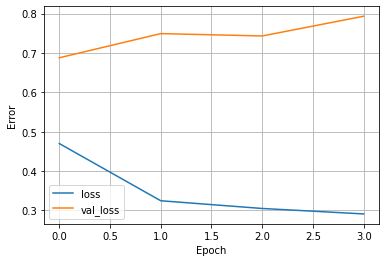

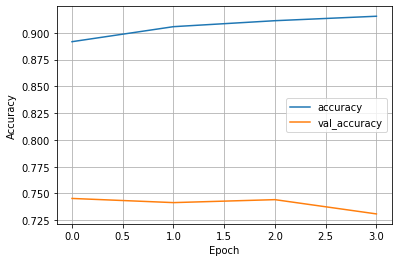

In [30]:
# plot loss
plot_loss(history['drop_model'])
# plot accuracy
plot_accuracy(history['drop_model'])

In [31]:
# final training loss
print('final training loss:' ,{history['drop_model'].history["loss"][-1]})
# final training accuracy
print('\nfinal training accuracy:', {history['drop_model'].history["accuracy"][-1]})
# final validation loss
print('\nfinal validation loss: ',{history['drop_model'].history["val_loss"][-1]})
# final validation accuracy
print('\nfinal validation accuracy:', {history['drop_model'].history["val_accuracy"][-1]})


final training loss: {0.291187584400177}

final training accuracy: {0.9153991937637329}

final validation loss:  {0.7930750250816345}

final validation accuracy: {0.7309156060218811}


In [32]:
Y_test_pred_d = drop_model.predict(x_test)
Y_test_pred_d=np.array([[1] if p>=0.5 else [0] for p in Y_test_pred_d])

#classification_report
print(classification_report(y_test_arr, Y_test_pred_d))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74    160000
           1       0.74      0.71      0.73    160000

    accuracy                           0.73    320000
   macro avg       0.73      0.73      0.73    320000
weighted avg       0.73      0.73      0.73    320000





*   Its seems that Model without regularizations are more prone to overfitting than with regularization.

*   Dropout is a regularization method that approximates training a large number of neural networks .During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.
*   *It says that dropout is more effective than L 2 -norm for complex networks i.e., containing large numbers of hidden neurons. * .Here also we can see that changing the position and reducing the value of drop out rate has more effect on the result(more prone to overfit).
